#### Vues 2310273001谌鹏

##### Utils

In [21]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

In [22]:
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
def plot_pred(gt, preds, labels, **kwargs):
    plt.plot(gt.reshape(-1), label=labels[0])
    for p, l in zip(preds, labels[1:]):
        plt.plot(p.reshape(-1), label=l)
        

    if 'xlabel' in kwargs.keys():
        plt.xlabel(kwargs['xlabel'])
    if 'ylabel' in kwargs.keys():
        plt.ylabel(kwargs['ylabel'])
    if 'title' in kwargs.keys():
        plt.title(kwargs['title'])

    plt.legend()
    # plt.show()

def plot_cdf(gt, preds, labels, **kwargs):
    for p, l in zip(preds, labels): 
        N = len(abs(gt - p))
        # print(N, len(np.sort(abs(gt - p).reshape(-1))))
        plt.plot(np.sort(abs(gt.reshape(-1, 1) - p).reshape(-1)), np.arange(N) / float(N), label=l)
        
    if 'xlabel' in kwargs.keys():
        plt.xlabel(kwargs['xlabel'])
    if 'ylabel' in kwargs.keys():
        plt.ylabel(kwargs['ylabel'])
    if 'title' in kwargs.keys():
        plt.title(kwargs['title'])
    if 'xlim' in kwargs.keys():
        plt.xlim(kwargs['xlim'][0])
    if 'ylim' in kwargs.keys():
        plt.ylim(kwargs['ylim'][0], kwargs['ylim'][1])
    plt.legend()
    # plt.show()
def plot_box():
    pass

##### Load User Trace

In [23]:
data_dir = './UserTrace'
data_files = sorted(os.listdir(data_dir))

In [24]:
fname = 'pos1.2no_036.csv'
his_len, int_len = 15, 30
step = 1
x_lst, y_lst = [], []

data = pd.read_csv(os.path.join(data_dir, fname))
for i in range(0, len(data) - (his_len + int_len), step):
    x_lst.append(np.array(data[['x', 'z']])[i: i + his_len])
    y_lst.append(np.array(data[['x', 'z']])[i + his_len+int_len - 1])

x, y = np.array(x_lst), np.array(y_lst)

x.shape, y.shape, os.path.join(data_dir, fname)

((940, 15, 2), (940, 2), './UserTrace/pos1.2no_036.csv')

##### Predict

In [25]:
pred_lr_x,  pred_lr_z  = [], []
pred_mlp_x, pred_mlp_z = [], []
pred_stb_x, pred_stb_z = [], []

t_bf = [[_] for _ in range(1, his_len + 1)]
t_tg = [[his_len + int_len]]

for _x_ in x:
    

    ### -- Linear Regression (LR)
    pred_lr_x.append(LinearRegression().fit(t_bf, _x_[:, 0]).predict(t_tg))
    pred_lr_z.append(LinearRegression().fit(t_bf, _x_[:, 1]).predict(t_tg))
    ### Linear Regression (LR) --

    ### -- MultiLayer Perceptron Regressor (MLP)
    pred_mlp_x.append(MLPRegressor(hidden_layer_sizes=(3,), activation='tanh', solver='lbfgs', max_iter=1200, random_state=7145)\
                      .fit(t_bf, _x_[:, 0]).predict(t_tg))
    pred_mlp_z.append(MLPRegressor(hidden_layer_sizes=(3,), activation='tanh', solver='lbfgs', max_iter=1200, random_state=7145)\
                      .fit(t_bf, _x_[:, 1]).predict(t_tg))
    ### MultiLayer Perceptron Regressor (MLP) --

    ### -- Stable (STB)
    pred_stb_x.append([_x_[:, 0][-1]])
    pred_stb_z.append([_x_[:, 1][-1]])
    ### Stable (STB) --

pred_lr_x,  pred_lr_z  = np.array(pred_lr_x),  np.array(pred_lr_z)
pred_mlp_x, pred_mlp_z = np.array(pred_mlp_x), np.array(pred_mlp_z)
pred_stb_x, pred_stb_z = np.array(pred_stb_x), np.array(pred_stb_z)

# pred_lr_x.shape,  pred_lr_z.shape, pred_mlp_x.shape, pred_mlp_z.shape, pred_stb_x.shape, pred_stb_z.shape


In [26]:
pred_lr_x.shape,  pred_lr_z.shape, pred_mlp_x.shape, pred_mlp_z.shape, pred_stb_x.shape, pred_stb_z.shape

((940, 1), (940, 1), (940, 1), (940, 1), (940, 1), (940, 1))

##### Plot predict result   

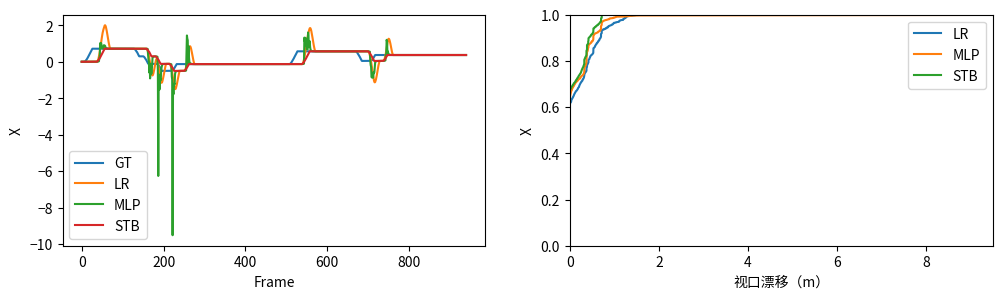

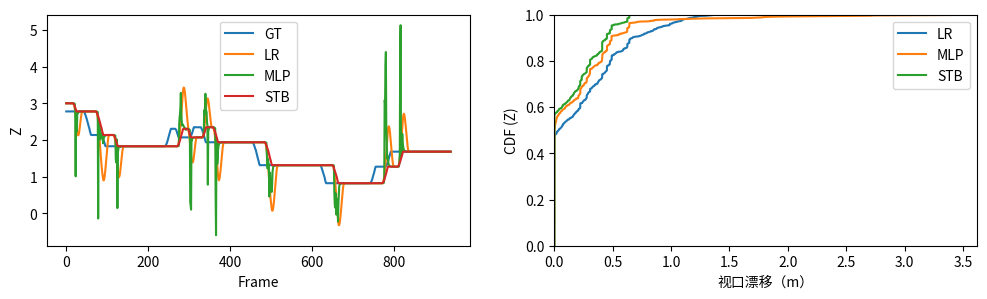

In [27]:
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plot_pred(y[:, 0], 
          [pred_lr_x, pred_mlp_x, pred_stb_x], ['GT', 'LR', 'MLP', 'STB'], 
          xlabel='Frame', ylabel='X')
plt.subplot(1, 2, 2)
plot_cdf(y[:, 0],
         [pred_lr_x, pred_mlp_x, pred_stb_x], ['LR', 'MLP', 'STB'],
         xlabel='视口漂移（m）', ylabel='X',
         xlim=(0,), ylim=(0.00,1.0))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plot_pred(y[:, 1], 
          [pred_lr_z, pred_mlp_z, pred_stb_z], ['GT', 'LR', 'MLP', 'STB'], 
          xlabel='Frame', ylabel='Z')
plt.subplot(1, 2, 2)
plot_cdf(y[:, 1],
         [pred_lr_z, pred_mlp_z, pred_stb_z], ['LR', 'MLP', 'STB'],
         xlabel='视口漂移（m）', ylabel='CDF (Z)',
         xlim=(0,), ylim=(0.00,1.0))

In [28]:
pred_lr_x, pred_lr_z, pred_mlp_x, pred_mlp_z, pred_stb_x, pred_stb_z = \
    pred_lr_x.reshape(-1), pred_lr_z.reshape(-1), pred_mlp_x.reshape(-1), \
    pred_mlp_z.reshape(-1), pred_stb_x.reshape(-1), pred_stb_z.reshape(-1)


##### Vues

In [29]:
Delta_s_x = abs(data['x'].diff()).sum() / (len(data) - 1)
Delta_s_z = abs(data['z'].diff()).sum() / (len(data) - 1)

Delta_s_x = max(data['x'].diff()[1:]) * 7
Delta_s_z = max(data['z'].diff()[1:]) * 7

Delta_s_x = max(data['x'].diff()[1:])
Delta_s_z = max(data['z'].diff()[1:])
Delta_s_x, Delta_s_z

(0.05092009999999997, 0.04775499999999999)

In [30]:
def rank_views(psts, gt_x, gt_z, past_frames, count=-1, α=100):
    Dv_i, Sv_i, Mv_i = [], [], []
    Dv, Sv, Mv, QoEs = [], [], [], []
    # print(psts)
    for pst in psts:
        if count == 0:
            _Dv_i = np.array([gt_x - pst[0], gt_z - pst[1]])
            _Sv_i  = 0
            _Mv_i  = 0

            _Dv = np.sqrt((_Dv_i ** 2).sum())
            _Sv = 0
            _Mv = 0
            
            _QoE = 100 - 1.92307 * α * _Dv
        elif count > 0:
            _Dv_i = np.array([gt_x - pst[0], gt_z - pst[1]])
            _Sv_i = _Dv_i - past_frames['best_psts_Dv_i'][-1]
            _Mv_i = np.array([pst[0] - past_frames['best_psts'][-1][0], pst[1] - past_frames['best_psts'][-1][1]])

            _Dv = past_frames['best_psts_Dv'][-1] + np.sqrt((_Dv_i ** 2).sum())
            _Sv = past_frames['best_psts_Sv'][-1] + np.sqrt((_Sv_i ** 2).sum())
            _Mv = past_frames['best_psts_Mv'][-1] + np.sqrt((_Mv_i ** 2).sum())

            _QoE = 100 - 10 * α * _Sv / count \
                    - 1.92307 * α * _Dv / (count + 1) \
                    - 0.28846 * α * _Mv / count

        Dv_i.append(_Dv_i)
        Sv_i.append(_Sv_i)
        Mv_i.append(_Mv_i)

        Dv.append(_Dv)
        Sv.append(_Sv)
        Mv.append(_Mv)
        QoEs.append(_QoE)

      
    ## -- Sort Sort
    idx = np.argsort(QoEs)

    ranked_Dv_i = np.array(Dv_i)[idx][::-1]
    ranked_psts = np.array(psts)[idx][::-1]


    ranked_Dv   = np.array(Dv)[idx][::-1]
    ranked_Sv   = np.array(Sv)[idx][::-1]
    ranked_Mv   = np.array(Mv)[idx][::-1]
    ranked_QoEs = np.array(QoEs)[idx][::-1]
    ## Sort Sort --
    past_frames['best_psts_Dv_i'].append(ranked_Dv_i[0])
    past_frames['best_psts'].append(ranked_psts[0])
    past_frames['best_psts_Dv'].append(ranked_Dv[0])
    past_frames['best_psts_Sv'].append(ranked_Sv[0])
    past_frames['best_psts_Mv'].append(ranked_Mv[0])


    return ranked_psts, ranked_Dv, ranked_Sv, ranked_Mv, ranked_QoEs



In [31]:
rst = []
sel_pst_num = 20
count = 0
# W <--> Z; H <--> X
past_frames = {
  'best_psts_Dv_i': [],
  'best_psts': [],
  'best_psts_Dv': [],
  'best_psts_Sv': [],
  'best_psts_Mv': [],
  
}
total = len(y)

for current in range(total):
  frame_psts_lst = []
  x_array = np.array([pred_lr_x[current], pred_mlp_x[current], pred_stb_x[current]]).T
  z_array = np.array([pred_lr_z[current], pred_mlp_z[current], pred_stb_z[current]]).T
  gt_x    = np.array(y[current].T[0])
  gt_z    = np.array(y[current].T[1])

  # for frame in range(frame_num):

  x_max, x_min = np.max(x_array), np.min(x_array)
  z_max, z_min = np.max(z_array), np.min(z_array)

  C_W = z_max - z_min
  C_H = x_max - x_min
  delta_w = 2 * Delta_s_z - 1 / 2 * C_W
  delta_h = 2 * Delta_s_x - 1 / 2 * C_H


  # x&z of upper left point
  Ox, Oz = x_min - delta_h, z_min - delta_w

  psts_lst = [
          # [
              [Ox, Oz],
              [Ox, Oz + 2 * Delta_s_z],
              [Ox, Oz + 4 * Delta_s_z],

              [Ox + Delta_s_x, Oz + Delta_s_z],
              [Ox + Delta_s_x, Oz + 2 * Delta_s_z],
              [Ox + Delta_s_x, Oz + 3 * Delta_s_z],

              [Ox + 2 * Delta_s_x, Oz],
              [Ox + 2 * Delta_s_x, Oz + Delta_s_z],
              [Ox + 2 * Delta_s_x, Oz + 2 * Delta_s_z],
              [Ox + 2 * Delta_s_x, Oz + 3 * Delta_s_z],
              [Ox + 2 * Delta_s_x, Oz + 4 * Delta_s_z],

              [Ox + 3 * Delta_s_x, Oz + Delta_s_z],
              [Ox + 3 * Delta_s_x, Oz + 2 * Delta_s_z],
              [Ox + 3 * Delta_s_x, Oz + 3 * Delta_s_z],

              [Ox + 4 * Delta_s_x, Oz],
              [Ox + 4 * Delta_s_x, Oz + 2 * Delta_s_z],
              [Ox + 4 * Delta_s_x, Oz + 4 * Delta_s_z],

              [x_array[0], z_array[0]],
              [x_array[1], z_array[1]],
              [x_array[2], z_array[2]],
      ]

  pred_gt_x, pred_gt_z = np.average(x_array), np.average(z_array)
  # print(current)
  # print(psts_lst)
  ranked_psts, ranked_Dv, ranked_Sv, ranked_Mv, ranked_QoEs = rank_views(psts_lst, pred_gt_x, pred_gt_z, past_frames, current)


  # if current % 11 == 0:
  # if current in list(range(300, 600)):
  #   plt.figure(figsize=(7, 4))
  #   plt.scatter(np.array(psts_lst)[:, 0],\
  #               np.array(psts_lst)[:, 1], label='genes', color='green')
  #   plt.scatter(x_array.reshape(-1), z_array.reshape(-1), marker='s', label='preds', color='blue')
  #   plt.scatter(sum(x_array.reshape(-1)) / 3, sum(z_array.reshape(-1)) / 3, marker='+', label='pred_gt')
  #   plt.scatter(gt_x, gt_z, marker='x', label='gt')
  #   for i, pst in enumerate(ranked_psts):
  #     plt.text(pst[0], pst[1], str(i))
  #   plt.xlabel('X')
  #   plt.ylabel('Z')
  #   plt.title('Frame' + str(current))
  #   plt.axis("equal")

  #   plt.legend()

  #   plt.show()

  rst.append(ranked_psts[:sel_pst_num])


In [32]:
### qoe for predict windows
show = []
tmp = rst
past_frames = {
  'best_psts_Dv_i': [],
  'best_psts': [],
  'best_psts_Dv': [],
  'best_psts_Sv': [],
  'best_psts_Mv': [],
  
}
for current in range(y.shape[0]):
  frame_psts_lst = []
  x_array = np.array([pred_lr_x[current], pred_mlp_x[current], pred_stb_x[current]]).T
  z_array = np.array([pred_lr_z[current], pred_mlp_z[current], pred_stb_z[current]]).T
  gt_x    = np.array(y[current].T[0])
  gt_z    = np.array(y[current].T[1])

  psts_lst = tmp[current]

  ranked_psts, ranked_Dv, ranked_Sv, ranked_Mv, ranked_QoEs = rank_views(psts_lst, gt_x, gt_z, past_frames, current)
  
  show.append(ranked_psts[0])

In [33]:
def cal_qoe(pst, gt_x, gt_z, past_frames, count=-1, α=21.6):   #10.6
    if count == 0:
        _Dv_i = np.array([gt_x - pst[0], gt_z - pst[1]])
        _Sv_i  = 0
        _Mv_i  = 0

        _Dv = np.sqrt((_Dv_i ** 2).sum())
        _Sv = 0
        _Mv = 0
        
        _QoE = 100 - 1.92307 * α * _Dv
    elif count > 0:
        _Dv_i = np.array([gt_x - pst[0], gt_z - pst[1]])
        _Sv_i = _Dv_i - past_frames['Dv_i'][-1]
        _Mv_i = np.array([pst[0] - past_frames['psts'][-1][0], pst[1] - past_frames['psts'][-1][1]])

        _Dv = past_frames['Dv'][-1] + np.sqrt((_Dv_i ** 2).sum())
        _Sv = past_frames['Sv'][-1] + np.sqrt((_Sv_i ** 2).sum())
        _Mv = past_frames['Mv'][-1] + np.sqrt((_Mv_i ** 2).sum())

        _QoE = 100 - 10 * α * _Sv / count \
                - 1.92307 * α * _Dv / (count + 1) \
                - 0.28846 * α * _Mv / count


    past_frames['Dv_i'].append(_Dv_i)  
    past_frames['psts'].append(pst)

    # past_frames['Dv'] = _Dv
    # past_frames['Sv'] = _Sv
    # past_frames['Mv'] = _Mv
    past_frames['Dv'].append(_Dv)
    past_frames['Sv'].append(_Sv)
    past_frames['Mv'].append(_Mv)
    past_frames['QoE'].append(_QoE)



    return ranked_psts, ranked_Dv, ranked_Sv, ranked_Mv, ranked_QoEs

In [34]:
show = np.array(show).reshape(y.shape[0], 2)
dv_vues, dv_lr, dv_mlp = [], [], []
sv_vues, sv_lr, sv_mlp = [], [], []
mv_vues, mv_lr, mv_mlp = [], [], []
qoe_vues, qoe_lr, qoe_mlp = [], [], []

past_frames_vues = {
  'psts': [],
  'Dv': [],
  'Sv': [],
  'Mv': [],
  'QoE':[],
  'Dv_i':[],
}
past_frames_lr = {
  'psts': [],
  'Dv': [],
  'Sv': [],
  'Mv': [],
  'QoE':[],
  'Dv_i':[],
}
past_frames_mlp = {
  'psts': [],
  'Dv': [],
  'Sv': [],
  'Mv': [],
  'QoE':[],
  'Dv_i':[],
}
for current in range(y.shape[0]):
  frame_psts_lst = []
  gt_x    = np.array(y[current].T[0])
  gt_z    = np.array(y[current].T[1])


  psts_lst_vues = show[current]
  psts_lst_lr   = [pred_lr_x[current], pred_lr_z[current]]
  psts_lst_mlp  = [pred_mlp_x[current], pred_mlp_z[current]]

  cal_qoe(psts_lst_vues, gt_x, gt_z, past_frames_vues, current)
  cal_qoe(psts_lst_lr,   gt_x, gt_z, past_frames_lr,   current)
  cal_qoe(psts_lst_mlp,  gt_x, gt_z, past_frames_mlp,  current)

qoe_vues.append(past_frames_vues['QoE'])
qoe_lr.append(past_frames_lr['QoE'])
qoe_mlp.append(past_frames_mlp['QoE'])
dv_vues.append(past_frames_vues['Dv'])
dv_lr.append(past_frames_lr['Dv'])
dv_mlp.append(past_frames_mlp['Dv'])
sv_vues.append(past_frames_vues['Sv'])
sv_lr.append(past_frames_lr['Sv'])
sv_mlp.append(past_frames_mlp['Sv'])
mv_vues.append(past_frames_vues['Mv'])
mv_lr.append(past_frames_lr['Mv'])
mv_mlp.append(past_frames_mlp['Mv'])

In [35]:
np.average(qoe_vues), np.average(qoe_lr), np.average(qoe_mlp)

(82.92929520572036, 65.70768226755203, 46.28334440913792)

In [36]:
np.median(qoe_vues), np.median(qoe_lr), np.median(qoe_mlp)

(84.2965326800147, 66.69343545770523, 49.05311088145032)

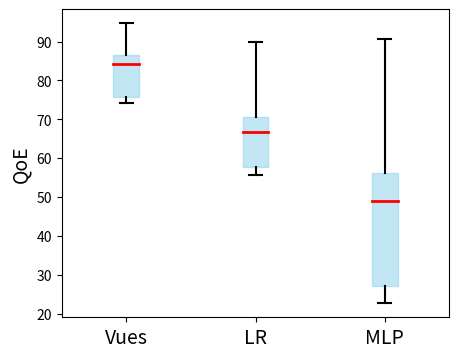

In [37]:
# plt.boxplot([np.array(qoe_vues).reshape(-1), np.array(qoe_lr).reshape(-1), np.array(qoe_mlp).reshape(-1)], labels=['Vues', 'LR', 'MLP'])
# plt.ylabel('QoE')
# plt.show()


plt.rcParams['font.family'] = 'Noto Sans CJK JP'
datasets = np.array([np.array(qoe_vues).reshape(-1), np.array(qoe_lr).reshape(-1), np.array(qoe_mlp).reshape(-1)])
# 开始绘图
plt.figure(figsize=(5, 4))

for i, data in enumerate(datasets, 1):
    # 计算每组数据的自定义四分位数
    expanded_q1, expanded_q3 = np.percentile(data, [5, 95])
    median = np.median(data)
    iqr = expanded_q3 - expanded_q1
    lower_whisker = np.min(data[data >= expanded_q1 - 1.5 * iqr])
    upper_whisker = np.max(data[data <= expanded_q3 + 1.5 * iqr])

    # 绘制箱体
    plt.fill_betweenx([expanded_q1, expanded_q3], i - 0.1, i + 0.1, color='skyblue', alpha=0.5)

    # 绘制中位数
    plt.plot([i - 0.1, i + 0.1], [median, median], color='red', linewidth=2)

    # 绘制胡须
    plt.plot([i, i], [lower_whisker, expanded_q1], color='black')
    plt.plot([i, i], [expanded_q3, upper_whisker], color='black')

    # 绘制胡须末端的横线
    plt.plot([i - 0.05, i + 0.05], [lower_whisker, lower_whisker], color='black')
    plt.plot([i - 0.05, i + 0.05], [upper_whisker, upper_whisker], color='black')

plt.xlim(0.5, len(datasets) + 0.5)
plt.ylabel('QoE', fontsize=14)
plt.xticks(range(1, datasets.shape[0] + 1), ['Vues', 'LR', 'MLP'], fontsize=14)
plt.show()




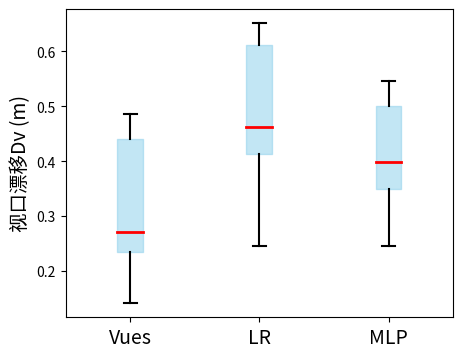

In [38]:
# df_dv = pd.DataFrame([np.array(dv_vues).reshape(-1)[1:] / np.arange(1, np.array(dv_vues).shape[-1]),
#                      np.array(dv_lr).reshape(-1)[1:] / np.arange(1, np.array(dv_lr).shape[-1]),
#                       np.array(dv_mlp).reshape(-1)[1:] / np.arange(1, np.array(dv_mlp).shape[-1]),]).T
# df_dv.columns = ['Vues', 'LR', 'MLP']
# plt.ylabel('Dv')
# # plt.title('Participant {}'.format(target + 1))
# df_dv.boxplot()
# plt.boxplot([np.array(dv_vues).reshape(-1)[1:] / np.arange(1, np.array(dv_vues).shape[-1]),
#             np.array(dv_lr).reshape(-1)[1:] / np.arange(1, np.array(dv_lr).shape[-1]),
#             np.array(dv_mlp).reshape(-1)[1:] / np.arange(1, np.array(dv_mlp).shape[-1]),], showfliers=False)
# plt.show()
# plt.boxplot([np.array(dv_vues).reshape(-1)[1:] / np.arange(1, np.array(dv_vues).shape[-1]),
#             np.array(dv_lr).reshape(-1)[1:] / np.arange(1, np.array(dv_lr).shape[-1]),
#             np.array(dv_mlp).reshape(-1)[1:] / np.arange(1, np.array(dv_mlp).shape[-1]),],  labels=['Vues', 'LR', 'MLP'], whis=1.5)
# plt.ylabel('Dv')
# plt.show()
plt.rcParams['font.family'] = 'Noto Sans CJK JP'

datasets = np.array([np.array(dv_vues).reshape(-1)[1:] / np.arange(1, np.array(dv_vues).shape[-1]),
            np.array(dv_lr).reshape(-1)[1:] / np.arange(1, np.array(dv_lr).shape[-1]),
            np.array(dv_mlp).reshape(-1)[1:] / np.arange(1, np.array(dv_mlp).shape[-1]),])
# 开始绘图
plt.figure(figsize=(5, 4))

for i, data in enumerate(datasets, 1):
    # 计算每组数据的自定义四分位数
    expanded_q1, expanded_q3 = np.percentile(data, [5, 95])
    median = np.median(data)
    iqr = expanded_q3 - expanded_q1
    lower_whisker = np.min(data[data >= expanded_q1 - 1.5 * iqr])
    upper_whisker = np.max(data[data <= expanded_q3 + 1.5 * iqr])

    # 绘制箱体
    plt.fill_betweenx([expanded_q1, expanded_q3], i - 0.1, i + 0.1, color='skyblue', alpha=0.5)

    # 绘制中位数
    plt.plot([i - 0.1, i + 0.1], [median, median], color='red', linewidth=2)

    # 绘制胡须
    plt.plot([i, i], [lower_whisker, expanded_q1], color='black')
    plt.plot([i, i], [expanded_q3, upper_whisker], color='black')

    # 绘制胡须末端的横线
    plt.plot([i - 0.05, i + 0.05], [lower_whisker, lower_whisker], color='black')
    plt.plot([i - 0.05, i + 0.05], [upper_whisker, upper_whisker], color='black')

plt.xlim(0.5, len(datasets) + 0.5)

plt.ylabel('视口漂移Dv (m)', fontsize=14)
plt.xticks(range(1, datasets.shape[0] + 1), ['Vues', 'LR', 'MLP'], fontsize=14)
plt.show()




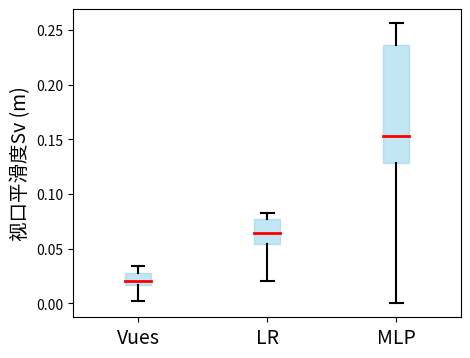

In [39]:
# plt.boxplot([np.array(sv_vues).reshape(-1)[1:] / np.arange(1, np.array(sv_vues).shape[-1]),
#             np.array(sv_lr).reshape(-1)[1:] / np.arange(1, np.array(sv_lr).shape[-1]),
#             np.array(sv_mlp).reshape(-1)[1:] / np.arange(1, np.array(sv_mlp).shape[-1]),], labels=['Vues', 'LR', 'MLP'], )
# plt.ylim(0, 0.5)
# plt.ylabel('Sv')
# plt.show()


plt.rcParams['font.family'] = 'Noto Sans CJK JP'

datasets = np.array([np.array(sv_vues).reshape(-1)[1:] / np.arange(1, np.array(sv_vues).shape[-1]),
            np.array(sv_lr).reshape(-1)[1:] / np.arange(1, np.array(sv_lr).shape[-1]),
            np.array(sv_mlp).reshape(-1)[1:] / np.arange(1, np.array(sv_mlp).shape[-1]),])
# 开始绘图
plt.figure(figsize=(5, 4))

for i, data in enumerate(datasets, 1):
    # 计算每组数据的自定义四分位数
    expanded_q1, expanded_q3 = np.percentile(data, [5, 95])
    median = np.median(data)
    iqr = expanded_q3 - expanded_q1
    lower_whisker = np.min(data[data >= expanded_q1 - 1.5 * iqr])
    upper_whisker = np.max(data[data <= expanded_q3 + 1.5 * iqr])

    # 绘制箱体
    plt.fill_betweenx([expanded_q1, expanded_q3], i - 0.1, i + 0.1, color='skyblue', alpha=0.5)

    # 绘制中位数
    plt.plot([i - 0.1, i + 0.1], [median, median], color='red', linewidth=2)

    # 绘制胡须
    plt.plot([i, i], [lower_whisker, expanded_q1], color='black')
    plt.plot([i, i], [expanded_q3, upper_whisker], color='black')

    # 绘制胡须末端的横线
    plt.plot([i - 0.05, i + 0.05], [lower_whisker, lower_whisker], color='black')
    plt.plot([i - 0.05, i + 0.05], [upper_whisker, upper_whisker], color='black')

plt.xlim(0.5, len(datasets) + 0.5)

plt.ylabel('视口平滑度Sv (m)', fontsize=14)
plt.xticks(range(1, datasets.shape[0] + 1), ['Vues', 'LR', 'MLP'], fontsize=14)
plt.show()


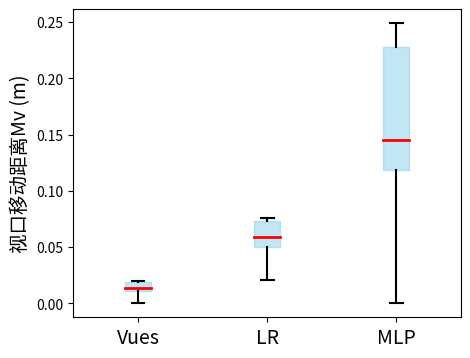

In [40]:
# plt.boxplot([np.array(sv_vues).reshape(-1)[1:] / np.arange(1, np.array(sv_vues).shape[-1]),
#             np.array(sv_lr).reshape(-1)[1:] / np.arange(1, np.array(sv_lr).shape[-1]),
#             np.array(sv_mlp).reshape(-1)[1:] / np.arange(1, np.array(sv_mlp).shape[-1]),], labels=['Vues', 'LR', 'MLP'], )
# plt.ylim(0, 0.5)
# plt.ylabel('Sv')
# plt.show()


plt.rcParams['font.family'] = 'Noto Sans CJK JP'

datasets = np.array([np.array(mv_vues).reshape(-1)[1:] / np.arange(1, np.array(mv_vues).shape[-1]),
            np.array(mv_lr).reshape(-1)[1:] / np.arange(1, np.array(mv_lr).shape[-1]),
            np.array(mv_mlp).reshape(-1)[1:] / np.arange(1, np.array(mv_mlp).shape[-1]),])
# 开始绘图
plt.figure(figsize=(5, 4))

for i, data in enumerate(datasets, 1):
    # 计算每组数据的自定义四分位数
    expanded_q1, expanded_q3 = np.percentile(data, [5, 95])
    median = np.median(data)
    iqr = expanded_q3 - expanded_q1
    lower_whisker = np.min(data[data >= expanded_q1 - 1.5 * iqr])
    upper_whisker = np.max(data[data <= expanded_q3 + 1.5 * iqr])

    # 绘制箱体
    plt.fill_betweenx([expanded_q1, expanded_q3], i - 0.1, i + 0.1, color='skyblue', alpha=0.5)

    # 绘制中位数
    plt.plot([i - 0.1, i + 0.1], [median, median], color='red', linewidth=2)

    # 绘制胡须
    plt.plot([i, i], [lower_whisker, expanded_q1], color='black')
    plt.plot([i, i], [expanded_q3, upper_whisker], color='black')

    # 绘制胡须末端的横线
    plt.plot([i - 0.05, i + 0.05], [lower_whisker, lower_whisker], color='black')
    plt.plot([i - 0.05, i + 0.05], [upper_whisker, upper_whisker], color='black')

plt.xlim(0.5, len(datasets) + 0.5)

plt.ylabel('视口移动距离Mv (m)', fontsize=14)
plt.xticks(range(1, datasets.shape[0] + 1), ['Vues', 'LR', 'MLP'], fontsize=14)
plt.show()
